In [ ]:
#importing the libaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the data set
from google.colab import files
files=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
new_data=df.drop(['RowNumber','CustomerId'	,'Surname'],axis=1)

In [ ]:
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
my_data=pd.get_dummies(new_data,columns=['Geography','Gender'],drop_first=True)
my_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
x=my_data.drop(columns=['Exited'])
y=my_data['Exited']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,ELU
from keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense( units=6,activation='relu',input_dim = 11))

In [ ]:
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [ ]:
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

In [ ]:
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))

In [ ]:

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 72        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
 dropout_5 (Dropout)         (None, 1)                

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 1.1764 - accuracy: 0.5990 - val_loss: 0.5120 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 1.0756 - accuracy: 0.7783 - val_loss: 0.4914 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 1.0542 - accuracy: 0.7962 - val_loss: 0.4850 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 1.0464 - accuracy: 0.7962 - val_loss: 0.4794 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 1.0513 - accuracy: 0.7962 - val_loss: 0.4754 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 1.0688 - accuracy: 0.7962 - val_loss: 0.4695 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.9442 - accuracy: 0.7962 - val_loss: 0.4635 - val_accuracy: 0.7955

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
ac=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(ac)

0.7975


In [ ]:
print(cm)

[[1595    0]
 [ 405    0]]


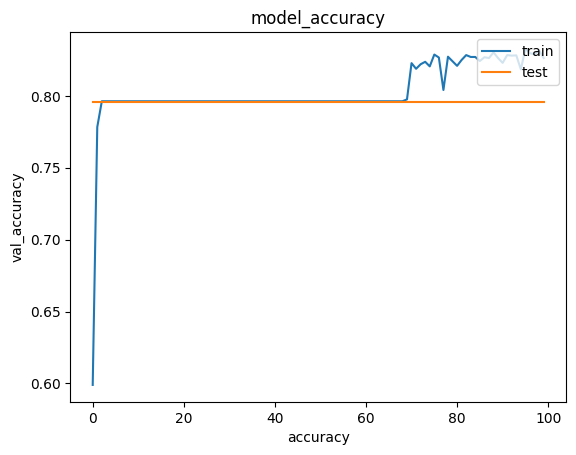

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['train','test'],loc='upper right')